In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('imdb_reviews.csv')

In [ ]:
df.head()

,Rating,Review Title
0,9.0,My Antidote to Marvel and Co.
1,10.0,It's 4am
2,9.0,It's exactly the opposite of your usual superh...
3,10.0,Unexpected
4,10.0,Definitly one of the best series this year


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        2009 non-null   float64
 1   Review Title  2040 non-null   object 
dtypes: float64(1), object(1)
memory usage: 32.0+ KB


In [ ]:
df.describe()

,Rating
count,2009.000000
mean,8.647586
std,2.108427
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [ ]:
df.isna().sum()

,0
Rating,31
Review Title,0


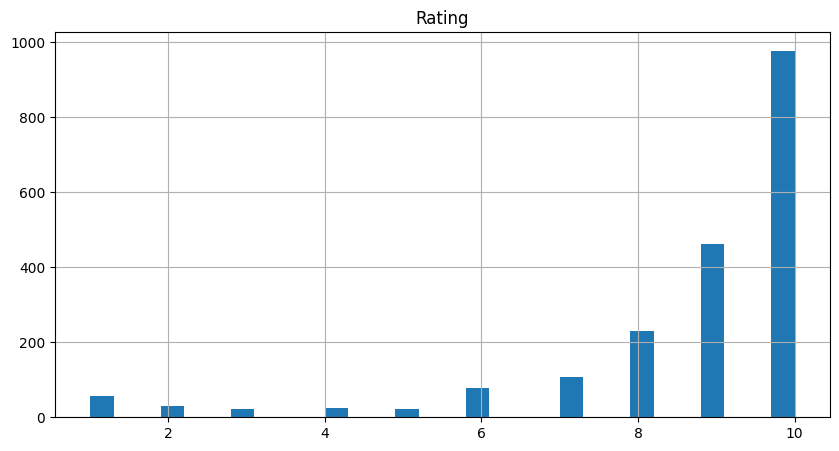

In [ ]:
df.hist(bins=30, figsize=(10,5))
plt.show()

In [ ]:
rows_without_rating = df[df['Rating'].isna()]

# Display the rows without a rating
rows_without_rating.head(), rows_without_rating.shape

(     Rating                                       Review Title
 38      NaN  Am I literally the only one that finds season ...
 53      NaN                     We waited two years for this?.
 253     NaN                      Brilliant take on superheroes
 305     NaN  Starts out strong but the writing suffers in t...
 331     NaN  Starts off great, bait'n'switch towards the en...,
 (31, 2))

In [ ]:
# Display the full 'Review Title' for the rows without a rating
rows_without_rating['Review Title'].tolist()

['Am I literally the only one that finds season 3 finale terrible',
 'We waited two years for this?.',
 'Brilliant take on superheroes',
 'Starts out strong but the writing suffers in the long run',
 "Starts off great, bait'n'switch towards the end...",
 'Exactly as I feared - a huge disappointment',
 'For All Those Who Hate SuperHero Movies/Shows Like Me, "You Will Fall In Love"',
 'Step aside MCU there is a new sherif in town.',
 'A Very different Take on Superheros',
 'Solid 1st season, sloppy 2nd season, garbage by the 3rd season',
 'Great show but stop with the weekly release schedule',
 'Season 2',
 'If you like Deadpool this is the show for you.',
 'Bring it.',
 'Not as impressed as most people',
 "it's been a while",
 "A shining beacon in today's day and age..",
 'Good',
 'Great',
 'Pretty great series',
 'When this show is so great, why got "Powers" cancelled ?',
 'loved this series!',
 'Weekly release for season 2?',
 'Worst casting ever',
 'Kripke continues to push the envel

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['length'] = df['Review Title'].apply(len)

In [ ]:
df.head()

,Rating,Review Title,length
0,9.0,My Antidote to Marvel and Co.,29
1,10.0,It's 4am,8
2,9.0,It's exactly the opposite of your usual superh...,55
3,10.0,Unexpected,10
4,10.0,Definitly one of the best series this year,42


In [ ]:
fig = px.histogram(df, x='length', nbins=100, title='Distribution of Review Titles Length')

fig.show()

In [ ]:
df['length'].describe()

,length
count,2009.000000
mean,28.004978
std,18.508988
min,3.000000
25%,15.000000
50%,25.000000
75%,37.000000
max,174.000000


In [ ]:
df[df['length']>100]

,Rating,Review Title,length
118,8.0,"""See, people love that cozy feeling that Supes...",166
135,10.0,Just the second scene broke my heart... imagin...,102
412,9.0,Like Superhero shows? Watch it. Hate superhero...,110
829,6.0,"Former freethinking series, gradually turns mo...",121
906,8.0,If you're tired from little purple pony univer...,149
958,7.0,Very good breakaway from the superhero trend o...,103
1414,5.0,A Story About A Soulless Corporation Pretendin...,143
1604,10.0,By far the BEST take and most instantly addict...,165
1859,10.0,"Unique. Incredible Series, the battles are ama...",174
1868,9.0,"""A Dark and Electrifying Masterpiece: 'The Boy...",123


### Seperating Negative and Positive Reviews

In [ ]:
positive = df[df['Rating']>6]
negative = df[df['Rating']<=6]

In [ ]:
print('Positive Dataset: ')
print(positive.head())
print('Negative Dataset: ')
print(negative.head())

Positive Dataset: 
   Rating                                       Review Title  length
0     9.0                      My Antidote to Marvel and Co.      29
1    10.0                                           It's 4am       8
2     9.0  It's exactly the opposite of your usual superh...      55
3    10.0                                         Unexpected      10
4    10.0         Definitly one of the best series this year      42
Negative Dataset: 
    Rating                                       Review Title  length
9      5.0                     This show fell off really hard      30
17     6.0  Season 1 and 2 are fire, 3 is okay, 4 is total...      52
18     4.0  Season 1 was great fun, season 4 has lost its ...      50
27     6.0                   S1-3 are great. 4 is a disgrace.      32
37     4.0                                 R.I.P. The Boys...      18


In [ ]:
fig = px.histogram(df,x='Rating', color ='Rating', title='Distribution of Ratings')
fig.show()

* **A rating of 5 is the most common response.**

In [ ]:
sentence = df['Review Title'].to_list()
sentence

['My Antidote to Marvel and Co.',
 "It's 4am",
 "It's exactly the opposite of your usual superhero show!",
 'Unexpected',
 'Definitly one of the best series this year',
 'Just... Wow. Dark, funny and gripping.',
 'About time',
 'Awesome!',
 'Excellent!!',
 'This show fell off really hard',
 "A superior 'Superhero' series",
 'Super hero reality check in affect',
 'Big things for Homelander',
 'Check it out. You will be surprised.',
 'A Super Series',
 'Ba-na-na-na-na-na-na-na-nannas!',
 'Fairly unique',
 'Season 1 and 2 are fire, 3 is okay, 4 is total TRASH',
 'Season 1 was great fun, season 4 has lost its mojo',
 'Top 2 Best of 2019',
 'Highly original and entertaining though S4 is disappointing',
 'Best of 2019',
 'What a treat!',
 'Karl Urban made this a 10',
 'Started Out Great, Slowly Disintegrating Each Season',
 "I can't stand comicbooks/superheroes...",
 'Anti-superheroes becoming our saviours',
 'S1-3 are great. 4 is a disgrace.',
 'Stop all other crapy super hero TV series and

In [ ]:
sentences = ' '.join(sentence)
sentences

'My Antidote to Marvel and Co. It\'s 4am It\'s exactly the opposite of your usual superhero show! Unexpected Definitly one of the best series this year Just... Wow. Dark, funny and gripping. About time Awesome! Excellent!! This show fell off really hard A superior \'Superhero\' series Super hero reality check in affect Big things for Homelander Check it out. You will be surprised. A Super Series Ba-na-na-na-na-na-na-na-nannas! Fairly unique Season 1 and 2 are fire, 3 is okay, 4 is total TRASH Season 1 was great fun, season 4 has lost its mojo Top 2 Best of 2019 Highly original and entertaining though S4 is disappointing Best of 2019 What a treat! Karl Urban made this a 10 Started Out Great, Slowly Disintegrating Each Season I can\'t stand comicbooks/superheroes... Anti-superheroes becoming our saviours S1-3 are great. 4 is a disgrace. Stop all other crapy super hero TV series and put all the money to this Mindblowing, laugh a minute experience Amazon finally did it! So great! Amazing T

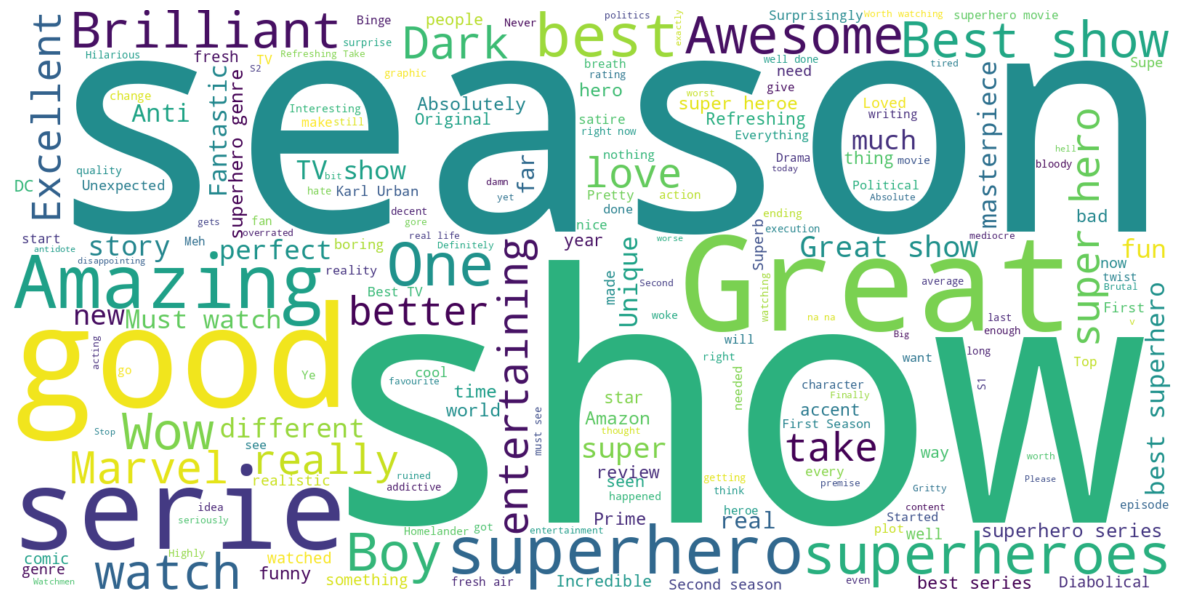

In [ ]:
from wordcloud import WordCloud as wc

plt.figure(figsize=(15,15))
wordcloud = wc(background_color='white', width=1600, height=800).generate(sentences)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## **Key Observations :**

* **Strong Positive Sentiment:** The presence of "Brilliant," "Amazing," "Wow," and other positive terms, especially in larger sizes, indicates a generally favorable reception of the show.
* **"Superheroes" with Mixed Sentiment:** The prominence of "Superheroes" and related words suggests that the show's unique take on the superhero genre is a central point of discussion. However, the presence of both positive and negative terms around it implies a range of opinions on how the show handles this theme.
* **Specific Themes & Elements:** Words like "Dark," "Original," "Different," "Story," and "Characters" highlight aspects that viewers likely find compelling and contribute to the positive sentiment.
* **Karl Urban:** The negative sentiment associated with "Karl Urban" is noteworthy. This could indicate criticism of his character (Billy Butcher) or his performance. Understanding the reasons behind this sentiment can be valuable for your analysis.
* **Potential for Controversy:** The presence of "Woke" suggests potential discussions around social or political themes within "The Boys." Analyzing sentiment around these themes could be interesting.

In [ ]:
negative_sentences = ' '.join(negative['Review Title'].to_list())
negative_sentences

'This show fell off really hard Season 1 and 2 are fire, 3 is okay, 4 is total TRASH Season 1 was great fun, season 4 has lost its mojo S1-3 are great. 4 is a disgrace. R.I.P. The Boys... Season 4 is a trainwreck What happened to The Boys? Season 4??? what the hell happened!!!!!! From Amazing Superhero Drama to Political Soapbox Dying an uglier death than characters on the show Season 4 took a turn for the worse The Boys: From Stellar Beginnings to a Disheartening Decline Declined after Season 2 The decline of a masterpiece What happened to season 4 ?!? Started off good... From a good show to the most boring thing I have ever seen Diminishing returns I\'m Out Season 2 is not a TV show but a political TV ad Beyond unnecessary graphic content make it unpleasant Season-1 was really good. Season-2 is going downhill really quick What happened?!? It wants to be different but it\'s exactly the same The Boys - A Season (4) of Unmet Expectations First season was awesome, second season is garbag

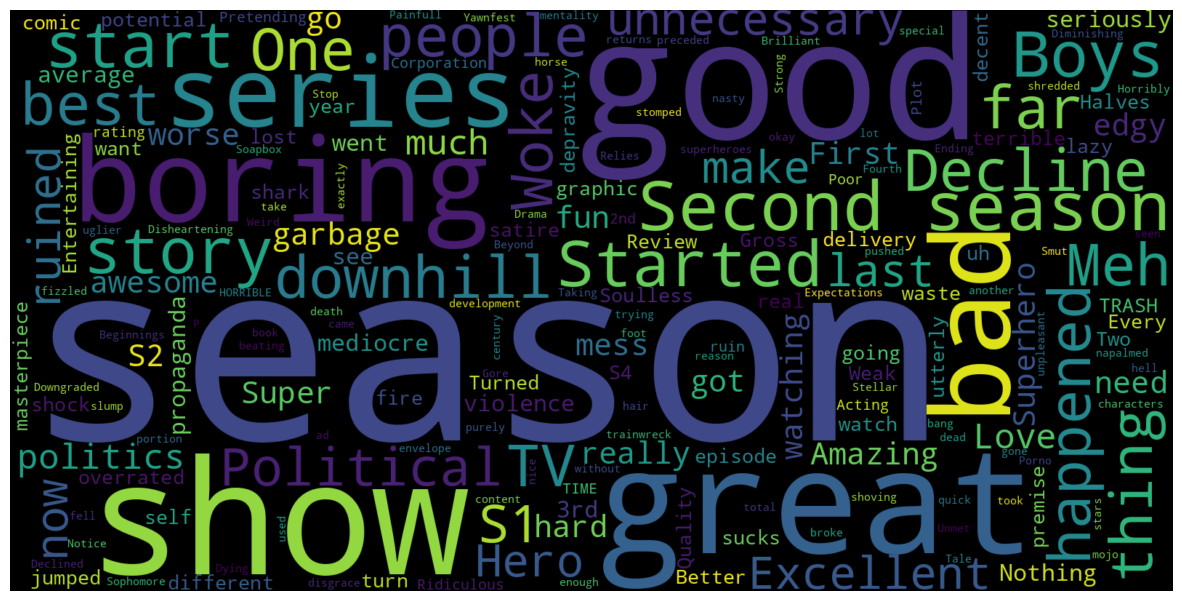

In [ ]:
plt.figure(figsize=(15,15))
wordcloud = wc(background_color='black', width=1600, height=800).generate(negative_sentences)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Negative Sentiment:**

* The presence of words like "Horrible," "Trash," "Garbage," "Bad," "Worse," "Boring," "Meh," and "Hate" clearly highlight a significant level of dissatisfaction among some viewers.
* The large size of "Season" and "Second Season," combined with negative terms, suggests that the second season is a particular focus of criticism.

##**Specific Criticisms:**

* **Story and Writing:** Words like "Story," "Mess," "Waste," "Downhill," "Fizzled," "Lost," and "Unnecessary" point towards perceived issues with the plot, pacing, or overall narrative direction.
* **Decline in Quality:** Terms like "Decline," "Downgraded," "Worse," and "Sophomore Slump" express the opinion that the show's quality has dropped, particularly in the second season.
* **Political Content:** The prominence of "Political" and "Politics," along with "Turned Political" and "Woke," indicates that some viewers are unhappy with the show's perceived political messaging or social commentary.
* **Shock Value and Violence:** The words "Violence," "Graphic," "Gore," and "Shock" suggest that some find the show's explicit content excessive or gratuitous.
* **Character Development:** "Characters" appearing near "Ruined" and "Death" could hint at dissatisfaction with how certain characters were handled or storylines resolved.
* **Misplaced Expectations:** Phrases like "Expectations" and "Hype" alongside negative words imply that the show failed to meet some viewers' anticipations.

## **Additional Observations:**

* The mix of positive words ("Great," "Amazing," "Excellent") suggests a polarized reception, with some viewers still enjoying the show despite the criticisms.
* The repetition of "Season" and "Second Season" emphasizes that the negative sentiment is largely concentrated on the latter part of the show.
* The presence of "Superhero" and related terms reinforces that the show's deconstruction of the superhero genre is a central element, though opinions on its execution vary.

**Overall, this word cloud illustrates that a significant portion of the audience has negative opinions about the show, primarily focused on perceived issues with the story, political content, excessive violence, and a decline in quality, particularly in the second season.**



In [ ]:
positive_sentences = ' '.join(positive['Review Title'].to_list())
positive_sentences

'My Antidote to Marvel and Co. It\'s 4am It\'s exactly the opposite of your usual superhero show! Unexpected Definitly one of the best series this year Just... Wow. Dark, funny and gripping. About time Awesome! Excellent!! A superior \'Superhero\' series Super hero reality check in affect Big things for Homelander Check it out. You will be surprised. A Super Series Ba-na-na-na-na-na-na-na-nannas! Fairly unique Top 2 Best of 2019 Highly original and entertaining though S4 is disappointing Best of 2019 What a treat! Karl Urban made this a 10 Started Out Great, Slowly Disintegrating Each Season I can\'t stand comicbooks/superheroes... Anti-superheroes becoming our saviours Stop all other crapy super hero TV series and put all the money to this Mindblowing, laugh a minute experience Amazon finally did it! So great! Amazing Thumbs up! 👍 Big f-you to Disney superheroes Yeah More Like This Please WT...happened with season 4? I Agree Watchmen meets Breaking Bad How I imagine Superheroes would 

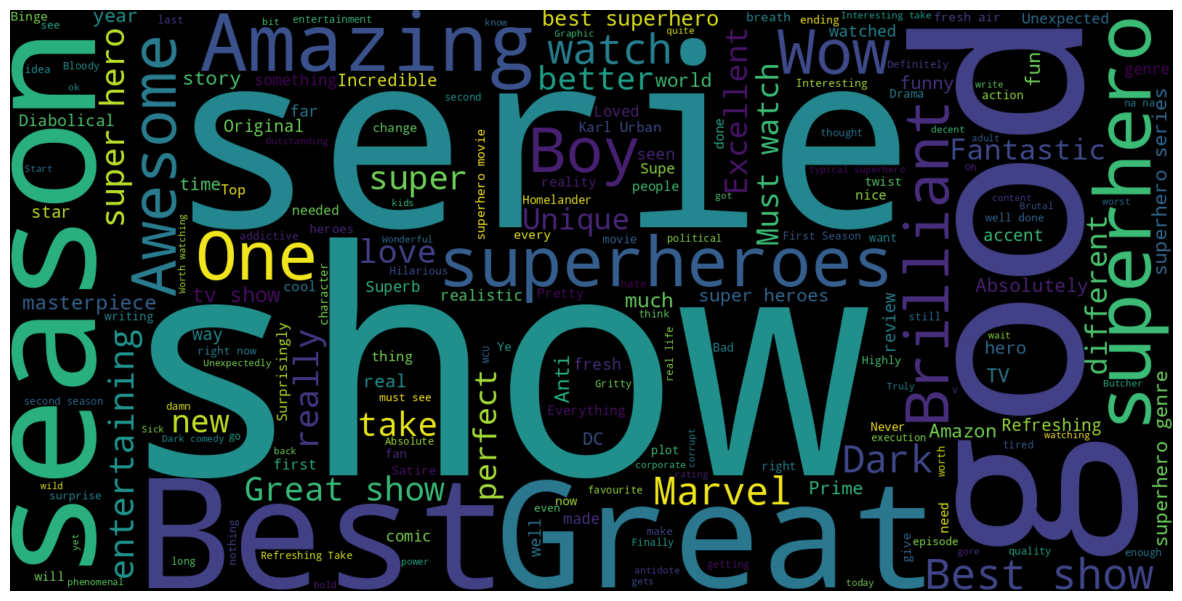

In [ ]:
plt.figure(figsize=(15,15))
wordcloud = wc(background_color='black', width=1600, height=800).generate(positive  _sentences)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##**Key Takeaways:**

* **Overwhelmingly Positive:** The dominance of words like "Great," "Amazing," "Awesome," "Best," "Fantastic," "Incredible," "Brilliant," and "Superb" in large sizes points to a highly positive overall sentiment.

* **Superhero Theme Well-Received:** The prominence of "Superhero," "Superheroes," and related terms like "Homelander" and "Marvel" suggests that the show's unique take on the superhero genre is a major hit.

* **Specific Praises:** Words like "Story," "Original," "Different," "Twist," "Refreshing," "Entertaining," "Action," and "Funny" highlight the aspects that viewers particularly appreciate. It seems the show is lauded for its originality, plot twists, humor, and action sequences.

* **Characters and Performances:** Mentions of "Karl Urban" and "Homelander" suggest these characters have made a strong impression. "Accent" might hint at appreciation for Karl Urban's performance.

* **Positive Surprise:** Words like "Unexpected" and "Surprisingly" indicate the show exceeded some viewers' expectations.

* **High Quality:** Terms like "Masterpiece," "Perfect," "Well Done," and "Must See" demonstrate that viewers consider the show to be of exceptional quality.

## **Additional Insights:**

* **Comparison to Others:** Mentions of "Marvel" and "DC" hint at comparisons to other superhero franchises.
* **Sense of Anticipation:** Phrases like "Must Watch" and "Can't Wait" express excitement for future seasons or episodes.

**Overall, the word cloud clearly depicts a very positive reception for the show, with praise for its originality, story, characters, and its fresh take on the superhero genre.**